# Pymaceuticals Inc.


### Analysis

Based on the most recent animal study for potential treatments for squamous cell carcinoma (SCC), we have discovered the several facts. The following data was gathered through 249 mice, in which the gender was evenly distributed and the number of mice tested for each drug regimen was farily evenly distributed as well. 

The box plot below shows the distrubution of the tumor volume for each treatment group. We discovered that among four treatments (Capomulin, Ramicane, Infubinol, and Ceftamin) Capomulin and Ramicane are more effective in inhibiting the growth of SCC. 

The line plot shows the Capomulin treatment of mouse b128 through the course of 45 days, in which we could see the tumor volume has dropped significally. 

The study on the average tumor volume vs. mouse weight for the Capomulin regimen has shown us a positive correlation between two variation. Under the Capomulin regimen, when a mice is heavier in weight, it's average tumor volume is higher. SO we could come to a conclude that weight has a negative effect in the drug effecticy of the Capomulin treatment. 

Please find the detailed data analysis process below. Thank you!
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
single_data_original = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
single_data_original.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice.
num_mice_total = single_data_original['Mouse ID'].drop_duplicates().size
print(num_mice_total)

249


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ID_with_timepoints = single_data_original[single_data_original.duplicated(subset=['Mouse ID','Timepoint'])]
duplicate_mouse_ID_with_timepoints.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id_df =single_data_original.loc[single_data_original['Mouse ID'] == 'g989']
duplicate_mouse_id_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = pd.concat([single_data_original, duplicate_mouse_id_df]).drop_duplicates(keep=False)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [11]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_df['Mouse ID'].drop_duplicates().size
print(num_mice_clean)

248


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

clean_df_drug_regimen = clean_df.groupby("Drug Regimen")
clean_df_drug_regimen.first()

clean_df_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
clean_df_mean.name = "Mean Tumor Volume"

clean_df_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
clean_df_median.name = "Median Tumor Volume"

clean_df_var = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
clean_df_var.name = "Tumor Volume Variance"

clean_df_std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
clean_df_std.name = "Tumor Volume Std. Dev."

clean_df_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
clean_df_sem.name = "Tumor Volume Std. Err."

# Assemble the resulting series into a single summary DataFrame.

frame=[clean_df_median.to_frame(),clean_df_var.to_frame(),clean_df_std.to_frame(),clean_df_sem.to_frame()]
df=clean_df_mean.to_frame()
for i in frame:
    df=df.merge(i, on='Drug Regimen')

display(df)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

series_list = [clean_df_mean,clean_df_median,clean_df_var,clean_df_std,clean_df_sem]
name_list = ['Mean Tumor Volume','Median Tumor Volume','Tumor Volume Variance','Tumor Volume Std. Dev.','Tumor Volume Std. Err.']
series_dict = {}
for i in range(5):
    series_dict[name_list[i]] = series_list[i]

frame_from_series = pd.DataFrame(series_dict)

display(frame_from_series)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [14]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Number of Mice Tested for Each Drug Regimen')

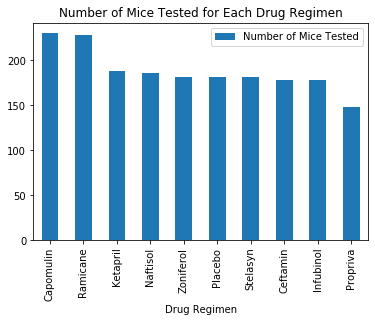

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_list = ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Placebo','Stelasyn','Ceftamin','Infubinol','Propriva']
timepoint_list = []
for i in drug_list:
    timepoint_list.append(clean_df_drug_regimen.get_group(i)['Timepoint'].size)

plot_df = pd.DataFrame({"Drug Regimen":drug_list, "Number of Mice Tested":timepoint_list},index=drug_list)
plot_df.plot.bar(x='Drug Regimen', y='Number of Mice Tested', rot=90)
plt.title("Number of Mice Tested for Each Drug Regimen")

Text(0, 0.5, 'Number of Mice Tested')

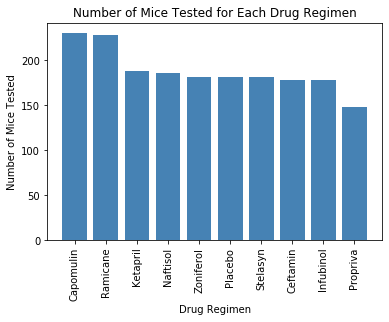

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.title("Number of Mice Tested for Each Drug Regimen")
x_axis = np.arange(len(timepoint_list))
plt.bar(x_axis, timepoint_list, color='steelblue', align="center")
plt.xticks(x_axis, drug_list, rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

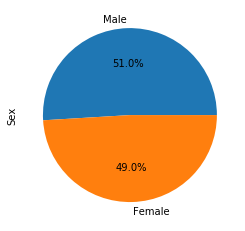

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_list = ['Male','Female']
sex_count = []
for i in sex_list:
    sex_count.append(len(clean_df[clean_df['Sex'] == i].index))

plot_df = pd.DataFrame({"Sex":sex_count},index=sex_list)
plot_df.plot.pie(y='Sex', autopct='%.1f%%',legend=False)


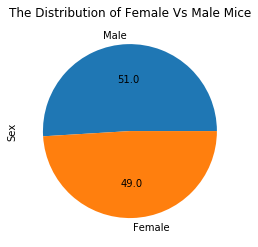

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("The Distribution of Female Vs Male Mice")
plt.pie(sex_count,labels = sex_list, autopct='%.1f')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_df.drop_duplicates(subset='Mouse ID', keep="last")


Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:214    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


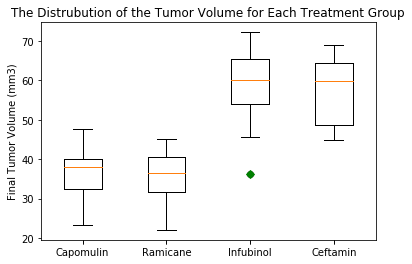

In [53]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol tumor_vol_list (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = last_timepoint_df[last_timepoint_df['Drug Regimen'] == drug]
    # add subset 
    drug_df_tumor = drug_df['Tumor Volume (mm3)']
    drug_quartiles = drug_df_tumor.quantile([.25,.5,.75])
    drug_lowerq = drug_quartiles[0.25]
    drug_upperq = drug_quartiles[0.75]
    drug_iqr = drug_upperq - drug_lowerq
    drug_lower_bound = drug_lowerq - (1.5*drug_iqr)
    drug_upper_bound = drug_upperq + (1.5*drug_iqr)
    # Determine outliers using upper and lower bounds
    drug_outliers = drug_df_tumor[(drug_df_tumor <= drug_lower_bound) | (drug_df_tumor >= drug_upper_bound)]
    print(f"{drug}'s potential outliers:{drug_outliers}")
    tumor_vol_list.append(drug_df_tumor)

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_list)
ax1.boxplot(tumor_vol_list, 0, 'gD')
ax1.set_xticklabels(treatments)
ax1.set_title("The Distrubution of the Tumor Volume for Each Treatment Group")
plt.show()  

    

## Line and Scatter Plots

In [54]:
import matplotlib.pyplot as plt
import numpy as np

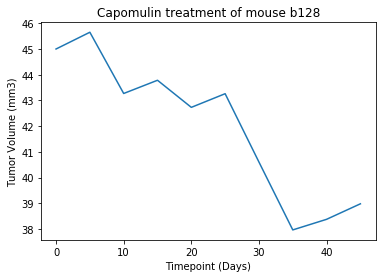

In [55]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#  Create a dataframe for all mouses treated with Capomulin.
cap_clean_df = clean_df[clean_df['Drug Regimen'] == "Capomulin"]

# Create a dataframe for a specific mouses treated with Capomulin.
b128_clean_df = cap_clean_df[cap_clean_df['Mouse ID'] == 'b128']

# Create a graph based upon the plot_df
plt.title("Capomulin treatment of mouse b128")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
x_axis = b128_clean_df['Timepoint']
y_axis = b128_clean_df['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis)

# Show the graph
plt.show()


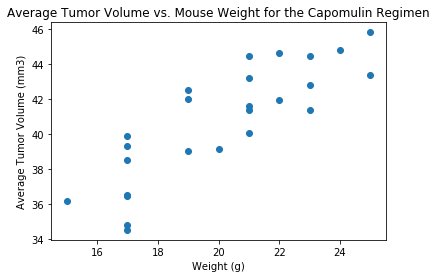

In [56]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plot_df = cap_clean_df[['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']]

cap_tumor_vol_mean = scatter_plot_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
y_axis = cap_tumor_vol_mean
plt.ylabel('Average Tumor Volume (mm3)')

weight_lst = scatter_plot_df.groupby("Mouse ID").mean()["Weight (g)"]
x_axis = weight_lst
plt.xlabel('Weight (g)')

plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.scatter(x_axis, y_axis)
plt.show()

## Correlation and Regression

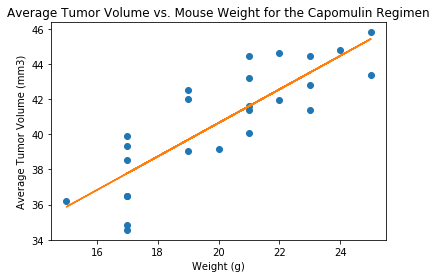

The correlation between mouse weight and the average tumor volume is 0.84


In [57]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

slope, intercept, r_value, p_value, std_err = st.linregress(weight_lst, cap_tumor_vol_mean)
line = slope * weight_lst + intercept
plt.plot(x_axis, y_axis, 'o', x_axis, line)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.show()

correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")